In [7]:
from geotool import tools
from geotool import raster

import inspect
from typing import AnyStr, Dict, Optional

from osgeo import gdal
import numpy as np

import earthpy.plot as ep

from rasterio import merge

import geopandas as gpd
import rasterio
from rasterio.mask import mask
from shapely.geometry import mapping

import rasterio
from rasterio.enums import Resampling

import os

inspect.signature(tools.listFiles)
help(tools.listFiles)

In [6]:
f = tools.listFiles('./img_bands/', 'tif')
f

['./img_bands\\landsat_img_01.tif',
 './img_bands\\landsat_img_02.tif',
 './img_bands\\landsat_img_03.tif']

In [35]:
# Open each GeoTIFF file and read bands
src_files_to_mosaic = []
bands_stack = []
for tiff_file in f:
    tiff_path = os.path.join(tiff_file)
    src = rasterio.open(tiff_path)
    src_files_to_mosaic.append(src)
    
    for band in range(1, src.count + 1):
        # Read each band as a separate numpy array
        band_data = src.read(band)
        bands_stack.append(band_data)

stacked_array = np.stack(bands_stack, axis=-1)
stacked_array.shape



[<open DatasetReader name='./img_bands\landsat_img_01.tif' mode='r'>,
 <open DatasetReader name='./img_bands\landsat_img_02.tif' mode='r'>,
 <open DatasetReader name='./img_bands\landsat_img_03.tif' mode='r'>]

In [ ]:
for band in range(1, src.count + 1):
    # Read each band as a separate numpy array
    band_data = src.read(band)
    bands_stack.append(band_data)

stacked_array = np.stack(bands_stack, axis=-1)
stacked_array.shape

In [29]:
with rasterio.open(f[0]) as src:
    meta = src.meta

meta.update(count=len(f))

with rasterio.open('stack.tif', 'w', **meta) as dst:
    for i, input in enumerate(f):
        with rasterio.open(input) as src:
            for band in range(1, src.count + 1):
                band_data = src.read(band)
                dst.write(band_data, band + 1)

IndexError: index 7 is out of bounds for axis 2 with size 7

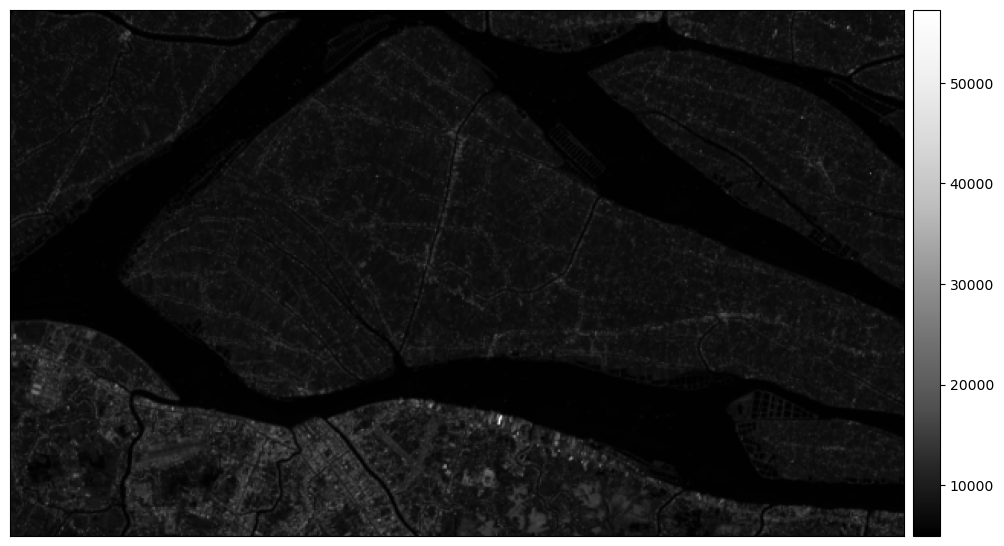

<Axes: >

In [34]:
ep.plot_bands(stacked_array[:,:, 6])

In [ ]:
import os
import rasterio
from rasterio.merge import merge
from rasterio.enums import Resampling
import numpy as np

def stack_geotiff_images(input_folder, output_path):
    # Get a list of all GeoTIFF files in the input folder
    tiff_files = [f for f in os.listdir(input_folder) if f.endswith('.tif') or f.endswith('.tiff')]

    # Check if there are at least two files
    if len(tiff_files) < 2:
        print("At least two GeoTIFF files are required for stacking.")
        return

    # Open each GeoTIFF file and read bands
    src_files_to_mosaic = []
    bands_stack = []
    for tiff_file in tiff_files:
        tiff_path = os.path.join(input_folder, tiff_file)
        src = rasterio.open(tiff_path)
        src_files_to_mosaic.append(src)
        
        for band in range(1, src.count + 1):
            # Read each band as a separate numpy array
            band_data = src.read(band)
            bands_stack.append(band_data)

    # Stack bands along a new dimension (3rd dimension)
    stacked_array = np.stack(bands_stack, axis=-1)

    # Create a new GeoTIFF file for the stacked bands
    with rasterio.open(output_path, 'w', **src.profile) as dst:
        # Write the stacked array to the new GeoTIFF file
        dst.write(stacked_array)

    # Close all source files
    for src in src_files_to_mosaic:
        src.close()

if __name__ == "__main__":
    # Specify the input folder containing GeoTIFF files
    input_folder = "path/to/your/geotiff/files"

    # Specify the output path for the stacked GeoTIFF file
    output_path = "path/to/your/output/stacked.tif"

    # Call the function to stack GeoTIFF images
    stack_geotiff_images(input_folder, output_path)

    print(f"Stacking completed. Stacked GeoTIFF saved to: {output_path}")


with rasterio.open(f[0]) as src:
    meta = src.meta

meta.update(count=len(f))

with rasterio.open('stack.tif', 'w', **meta) as dst:
    for i, input in enumerate(f):
        with rasterio.open(input) as src:
            for band in range(1, src.count + 1):
                band_data = src.read(band)
                dst.write(band_data, band + 1)



def stack_geotiffs(input_files, output_file):
    # Open the first GeoTIFF file to get the metadata
    with rasterio.open(input_files[0]) as src0:
        meta = src0.meta

    # Update metadata to reflect the number of bands
    meta.update(count=len(input_files))

    # Create the output stacked GeoTIFF file
    with rasterio.open(output_file, 'w', **meta) as dst:
        for i, input_file in enumerate(input_files):
            with rasterio.open(input_file) as src:
                # Read and write each band
                for band_num in range(1, src.count + 1):
                    band_data = src.read(band_num)
                    dst.write(band_data, band_num + i)